# Single Server Queue Simulation

## Import library

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

## Initialize the class

If you want to simulate the queue for 7 days in a row. For convenient you just need to create an object from class and call the simulation() method every iteration. In order to do that, we use OOP concept
<br>

In this project, I create class called QueueSim which contains some methods:
1. \__init__ to initialize the object's attributes
2. simulation() to run the queue simulation
3. simulation_table() to create data frame from simulation data based on simulation() method
4. queue_table() to create data frame from simulation_table() to show customer activity in a given time
5. server_utilization() to calculate the server utilization which we can get from:
> $\rho=\lambda E(S)$
>  
> Where
> - $\lambda$ is arrival rate customers per time unit, we can get lambda from $\lambda=\frac{N}{T}$, where N is total customers in range of time [0, T] and T is period of time which is the time when system have completed the services
> - E(S) is expectation value of service time or average of service time
6. average_waiting_time() to calculate how much the customer spend their time in waiting line in average
7. show_graph() to visualize customer arrival

In [2]:
class QueueSim:
    def __init__(self, total_cust, next_time=[], serv_time=[]):
        self.next_time = next_time
        self.serv_time = serv_time
        self.tot_cust = total_cust
        
    def update_time(self, new_next, new_serv):
        self.next_time = new_next
        self.serv_time = new_serv
        
    def simulation(self):
        self.arr_time = np.zeros(self.tot_cust, dtype=int)
        self.start_serv = np.zeros(self.tot_cust, dtype=int)
        self.end_serv = np.zeros(self.tot_cust, dtype=int)
        self.waiting_time = np.zeros(self.tot_cust, dtype=int)
        
        for i in range(self.tot_cust):
            self.arr_time[i] = self.arr_time[i - 1] + self.next_time[i]
            self.start_serv[i] = max(self.arr_time[i], self.end_serv[i - 1])
            self.end_serv[i] = self.start_serv[i] + self.serv_time[i]
        
        self.waiting_time = self.start_serv - self.arr_time
        
    def simulation_table(self):
        df = pd.DataFrame([self.next_time, self.arr_time, self.waiting_time,
                           self.start_serv, self.serv_time, self.end_serv]).T
        df.columns = ['Next', 'Arrival', 'Waiting', 'Start', 'Service', 'End']
        return df
    
    def queue_table(self):
        time = np.concatenate((self.arr_time, self.end_serv))
        cust_system = np.zeros(time.shape, dtype=int)
        
        act = np.empty(time.shape, dtype='U6')
        act[0:target_cust] = 'ARRIVE'
        act[target_cust: target_cust * 2] = 'LEAVE'
        
        cust_id = np.concatenate((np.arange(0, self.tot_cust, 1), np.arange(0, self.tot_cust, 1)))
        
        df2 = pd.DataFrame([time, cust_id, act]).T.sort_values(by=0).reset_index(drop=True)
        df2.columns = ['Time', 'Customer', 'Activity']
        
        for i in range(time.shape[0]):
            if df2.loc[:, 'Activity'][i] == 'ARRIVE':
                cust_system[i] = cust_system[i - 1] + 1
            else:
                cust_system[i] = cust_system[i - 1] - 1
        
        df2['Customers in System'] = cust_system.T
        
        return df2
    
    def server_utilization(self):
        return (self.tot_cust/self.end_serv[-1]) * (np.mean(self.serv_time))
    
    def average_waiting_time(self):
        sum = 0
        for i in range(self.tot_cust):
            sum += self.waiting_time[i]
            
        return sum/self.tot_cust
    
    def show_graph(self):
        time_stamp = np.arange(0, self.end_serv[-1]*1.01, 1)
        cust = np.zeros(time_stamp.shape[0])
        
        data = self.queue_table()
        
        for i in range(self.tot_cust * 2 - 1):
            cust[data.loc[:, 'Time'][i]:data.loc[:, 'Time'][i + 1]] = data.loc[:, 'Customers in System'][i]
        
        ax = plt.figure(figsize=(12, 4)).gca()
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.step(time_stamp, cust)
        
        plt.title('Customers Arrival')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Number of Customers in System')

## Simulation Example 1

In this example, we run the simulation once (just one day)

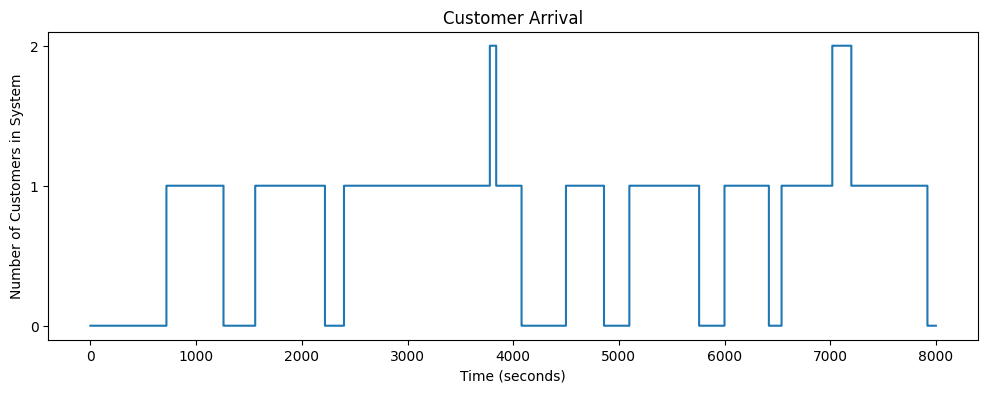

Server utilization: 0.7196969696969697
The average of waiting time: 0.4 minutes


In [3]:
target_cust = 10

next_arr_time = np.random.poisson(12, target_cust).astype(int) * 60
service_time = np.random.normal(10, 2, target_cust).astype(int) * 60

queue1 = QueueSim(target_cust, next_arr_time, service_time)

queue1.simulation()
    
queue1.show_graph()
plt.title(f'Customer Arrival')
    
plt.show()
print(f'Server utilization: {queue1.server_utilization()}\nThe average of waiting time: {queue1.average_waiting_time()/60} minutes')

Next, we can show the data frame from the simulation by calling the methods of the class

In [4]:
queue1.simulation_table()

,Next,Arrival,Waiting,Start,Service,End
0,720,720,0,720,540,1260
1,840,1560,0,1560,660,2220
2,840,2400,0,2400,780,3180
3,780,3180,0,3180,660,3840
4,600,3780,60,3840,240,4080
5,720,4500,0,4500,360,4860
6,600,5100,0,5100,660,5760
7,900,6000,0,6000,420,6420
8,540,6540,0,6540,660,7200
9,480,7020,180,7200,720,7920


In [5]:
queue1.queue_table()

,Time,Customer,Activity,Customers in System
0,720,0,ARRIVE,1
1,1260,0,LEAVE,0
2,1560,1,ARRIVE,1
3,2220,1,LEAVE,0
4,2400,2,ARRIVE,1
5,3180,3,ARRIVE,2
6,3180,2,LEAVE,1
7,3780,4,ARRIVE,2
8,3840,3,LEAVE,1
9,4080,4,LEAVE,0


## Simulation Example 2

In this example, we run the simulation in a year or 365 days

In [6]:
target_cust = 10
total_simulation = 365 #number of days

serv_util = np.zeros(total_simulation)
waiting_arr = np.zeros(total_simulation)
end_time = np.zeros(total_simulation)

queue2 = QueueSim(target_cust)

for i in range(total_simulation):
    next_arr_time = np.random.poisson(12, target_cust).astype(int) * 60
    service_time = np.random.normal(10, 2, target_cust).astype(int) * 60
    
    queue2.update_time(next_arr_time, service_time)
    queue2.simulation()

    serv_util[i] = queue2.server_utilization()
    waiting_arr[i] = queue2.average_waiting_time() / 60
    end_time[i] = queue2.end_serv[-1]

Because we run the simulation 365 days, we can summarize the data from each day

In [7]:
summarize_data = pd.DataFrame([waiting_arr, serv_util, end_time/3600]).T
summarize_data.columns = ['Average of waiting time (minutes)', 'Server Utilization', 'End Time (hours)']

summarize_data

,Average of waiting time (minutes),Server Utilization,End Time (hours)
0,0.3,0.796748,2.050000
1,1.3,0.821705,2.150000
2,0.4,0.720588,2.266667
3,1.1,0.823009,1.883333
4,1.5,0.768000,2.083333
...,...,...,...
360,0.2,0.697183,2.366667
361,0.7,0.709677,2.066667
362,0.0,0.661972,2.366667
363,0.8,0.834783,1.916667


In [8]:
summarize_data.describe()

,Average of waiting time (minutes),Server Utilization,End Time (hours)
count,365.000000,365.000000,365.000000
mean,0.986027,0.735644,2.164475
std,1.108903,0.069298,0.174761
min,0.000000,0.493671,1.783333
25%,0.300000,0.688889,2.033333
50%,0.700000,0.732824,2.166667
75%,1.200000,0.783333,2.266667
max,10.600000,0.923077,2.716667


We can also visualize the distribution of data using histogram

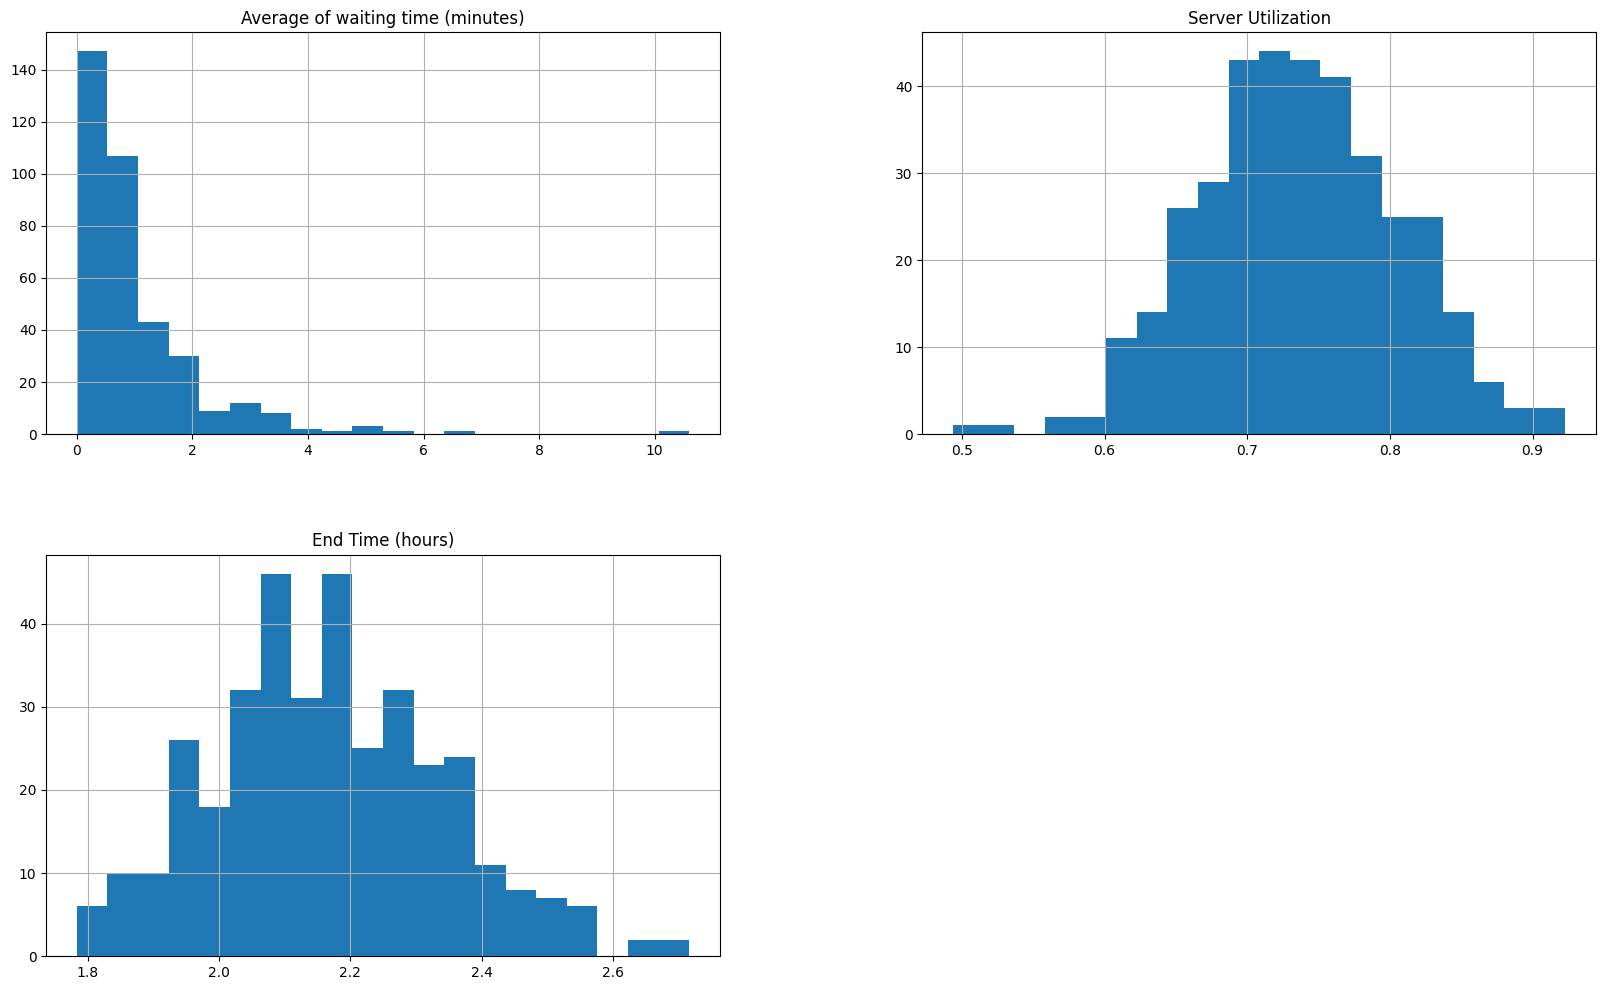

In [9]:
summarize_data.hist(bins=20, figsize=(20, 12))
plt.show()